In [32]:
# Importing Libraries for Data Exploration
import numpy as np
import pandas as pd

# Using Tensorflow for distant Applications
from tensorflow import keras
from tensorflow.keras import layers

In [33]:
# Reading the Test and Training DataSet
train_data = pd.read_csv("TRAIN.csv")
test_data = pd.read_csv("TEST.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [34]:
# Finding the Headers and Values
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1
3,500,4,2013-05-23,1,0,0,1
4,82,2,2013-08-06,1,0,0,1


In [35]:
# Using Datasets to split their values based on a,b,c
holidays1=train_data['StateHoliday']
holidays2=test_data['StateHoliday']

train_data['StateHoliday_a']=(holidays1=='a')*1.0
train_data['StateHoliday_b']=(holidays1=='b')*1.0
train_data['StateHoliday_c']=(holidays1=='c')*1.0

test_data['StateHoliday_a']=(holidays2=='a')*1.0
test_data['StateHoliday_b']=(holidays2=='b')*1.0
test_data['StateHoliday_c']=(holidays2=='c')*1.0

In [36]:
# Splitting the values based on Date
s=pd.to_datetime(train_data['Date'],format='%Y-%m-%d')

train_data['year']=s.dt.year
train_data['month']=s.dt.month
train_data['day']=s.dt.day

train_data.pop('Date')


0         2015-07-31
1         2015-07-31
2         2015-07-31
3         2015-07-31
4         2015-07-31
             ...    
712041    2013-10-01
712042    2013-10-01
712043    2013-10-01
712044    2013-10-01
712045    2013-10-01
Name: Date, Length: 712046, dtype: object

In [37]:
# Popping the Customers Valuation
train_data.pop('Customers')

0          555
1          625
2          821
3         1498
4          559
          ... 
712041     836
712042     588
712043    1043
712044     475
712045     599
Name: Customers, Length: 712046, dtype: int64

In [38]:
# Splitting the Test Dataset
s=pd.to_datetime(test_data['Date'],format='%Y-%m-%d')

test_data['year']=s.dt.year
test_data['month']=s.dt.month
test_data['day']=s.dt.day

test_data.pop('Date')

0         2013-04-01
1         2013-03-16
2         2013-08-01
3         2013-05-23
4         2013-08-06
             ...    
305158    2013-05-28
305159    2013-03-02
305160    2013-09-16
305161    2013-06-22
305162    2013-09-07
Name: Date, Length: 305163, dtype: object

In [39]:
# Printing the Valuation of Dataset
print(train_data.head())
print(test_data.head())

   Store  DayOfWeek  Sales  Open  ...  StateHoliday_c  year  month  day
0      1          5   5263     1  ...             0.0  2015      7   31
1      2          5   6064     1  ...             0.0  2015      7   31
2      3          5   8314     1  ...             0.0  2015      7   31
3      4          5  13995     1  ...             0.0  2015      7   31
4      5          5   4822     1  ...             0.0  2015      7   31

[5 rows x 13 columns]
   Store  DayOfWeek  Open  Promo  ... StateHoliday_c  year  month  day
0    767          1     0      0  ...            0.0  2013      4    1
1   1111          6     1      0  ...            0.0  2013      3   16
2     45          4     1      1  ...            0.0  2013      8    1
3    500          4     1      0  ...            0.0  2013      5   23
4     82          2     1      0  ...            0.0  2013      8    6

[5 rows x 12 columns]


In [40]:
# Popping the values of dataset based on sales
train_stats=train_data.describe()
train_stats.pop('Sales')
train_stats=train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
Store,712046.0,558.427662,321.965298,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,712046.0,3.999787,1.996273,1.0,2.0,4.0,6.0,7.0
Open,712046.0,0.828574,0.376881,0.0,1.0,1.0,1.0,1.0
Promo,712046.0,0.380600,0.485535,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,712046.0,0.172167,0.377526,0.0,0.0,0.0,0.0,1.0
StateHoliday_a,712046.0,0.020428,0.141461,0.0,0.0,0.0,0.0,1.0
StateHoliday_b,712046.0,0.006264,0.078895,0.0,0.0,0.0,0.0,1.0
StateHoliday_c,712046.0,0.005758,0.075663,0.0,0.0,0.0,0.0,1.0
year,712046.0,2014.188989,0.662752,2013.0,2014.0,2014.0,2015.0,2015.0
month,712046.0,6.196426,3.539482,1.0,3.0,6.0,10.0,12.0


In [41]:
# Training X and Y
x_train=train_data.drop(['Sales'],axis=1)
y_train=train_data['Sales']

In [42]:
y_train

0          5263
1          6064
2          8314
3         13995
4          4822
          ...  
712041    10182
712042     5352
712043     6652
712044     3842
712045     6143
Name: Sales, Length: 712046, dtype: int64

In [43]:
#Training Normalied Values
def norm(x):
  return( (x-train_stats['mean']) / train_stats['std'] )

norm_x_train=norm(x_train)
norm_test=norm(test_data)

In [44]:
# Popping the Normalized value
norm_x_train.pop('StateHoliday')
norm_test.pop('StateHoliday')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
305158    NaN
305159    NaN
305160    NaN
305161    NaN
305162    NaN
Name: StateHoliday, Length: 305163, dtype: object

In [45]:
# Checking the header values
norm_test.head()

,DayOfWeek,Open,Promo,SchoolHoliday,StateHoliday_a,StateHoliday_b,StateHoliday_c,Store,day,month,year
0,-1.502694,-2.198505,-0.783879,2.192783,-0.144411,12.595688,-0.076101,0.647810,-1.676681,-0.620550,-1.794018
1,1.001974,0.454854,-0.783879,-0.456041,-0.144411,-0.079392,-0.076101,1.716248,0.030985,-0.903077,-1.794018
2,0.000107,0.454854,1.275706,2.192783,-0.144411,-0.079392,-0.076101,-1.594668,-1.676681,0.509559,-1.794018
3,0.000107,0.454854,-0.783879,2.192783,-0.144411,-0.079392,-0.076101,-0.181472,0.827896,-0.338023,-1.794018
4,-1.001760,0.454854,-0.783879,2.192783,-0.144411,-0.079392,-0.076101,-1.479748,-1.107459,0.509559,-1.794018


In [46]:
kernel_regularizer=keras.regularizers.l2(1e-4)

In [47]:
# Shaping the input value
input_shape=[norm_x_train.shape[1]]

In [48]:
# Using Keras for layer modulation and customized activation energy
model=keras.Sequential([
   layers.Dense(150,activation='relu',input_shape=input_shape,kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),
   layers.Dense(150,activation='relu',kernel_regularizer=keras.regularizers.l2(1)),
   layers.Dropout(rate=0.2),

   layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   layers.Dropout(rate=0.2),
   layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   layers.Dropout(rate=0.2),
   layers.Dense(50,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   layers.Dropout(rate=0.2),
   layers.Dense(36,activation='relu',activity_regularizer=keras.regularizers.l2(1e-2)),
   layers.Dropout(rate=0.3),

   layers.Dense(1)
])

In [49]:
# Initializing the Optimizer values
optimizer=keras.optimizers.RMSprop(0.01)
metric1=keras.metrics.RootMeanSquaredError()
metric2=keras.metrics.MeanAbsoluteError()
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[metric1]
)

In [50]:
# Stopping the values while gaining the value using epoch
early_stopping=keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=0
)

In [51]:
# Fitting the value
history=model.fit(
    norm_x_train,y_train,
    validation_split=0.7,
    epochs=100,
    batch_size=512,
    callbacks = [early_stopping] 
)

Epoch 1/100
418/418 [==============================] - 11s 24ms/step - loss: 6002.5967 - root_mean_squared_error: 6947.6917 - val_loss: 5598.1147 - val_root_mean_squared_error: 6554.9141
Epoch 2/100
418/418 [==============================] - 10s 23ms/step - loss: 5537.8312 - root_mean_squared_error: 6318.2222 - val_loss: 5077.0693 - val_root_mean_squared_error: 5548.0049
Epoch 3/100
418/418 [==============================] - 10s 23ms/step - loss: 4984.5418 - root_mean_squared_error: 5282.4893 - val_loss: 4400.3901 - val_root_mean_squared_error: 4472.5220
Epoch 4/100
418/418 [==============================] - 10s 24ms/step - loss: 4327.5957 - root_mean_squared_error: 4305.8340 - val_loss: 3859.1829 - val_root_mean_squared_error: 3929.3010
Epoch 5/100
418/418 [==============================] - 10s 23ms/step - loss: 3854.1553 - root_mean_squared_error: 3815.5187 - val_loss: 3487.8127 - val_root_mean_squared_error: 3540.6797
Epoch 6/100
418/418 [==============================] - 10s 23ms/s

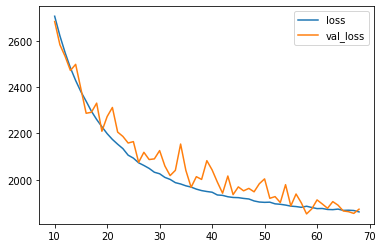

In [52]:
# Plotting the DataFrame
history_df=pd.DataFrame(history.history)
history_df.loc[10:,['loss','val_loss']].plot()

In [53]:
# Developing the Sales values
prediction=model.predict(norm_test)
result_df=pd.DataFrame(data=(prediction),columns=['Sales'])
result=result_df['Sales']

In [54]:
result

0            0.348038
1         5554.187500
2         9079.082031
3         6572.225586
4         9241.600586
             ...     
305158    9561.313477
305159    7751.929688
305160    6280.688477
305161    5804.329590
305162    5623.683594
Name: Sales, Length: 305163, dtype: float32

In [55]:
result_csv=result.to_csv('sales_2.csv',index=True)

In [56]:
data = pd.read_csv("sales_2.csv");
data.head()

,Unnamed: 0,Sales
0,0,0.348038
1,1,5554.187500
2,2,9079.082000
3,3,6572.225600
4,4,9241.601000
